In [1]:
import pandas as pd
import numpy as np
from qtrl.fitting.simple_fitting import *
import matplotlib.pyplot as plt

# Load and Fit Data

In [2]:
dpath = "cal-bus-amp-07032024\\"

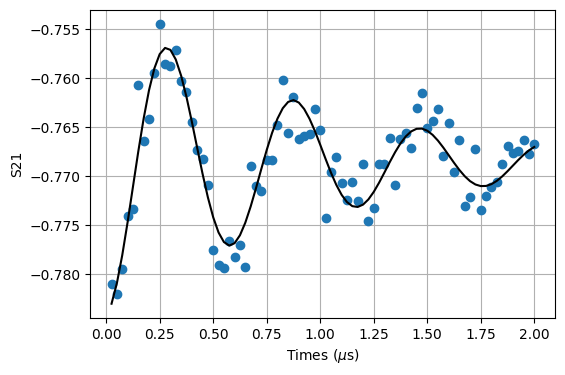

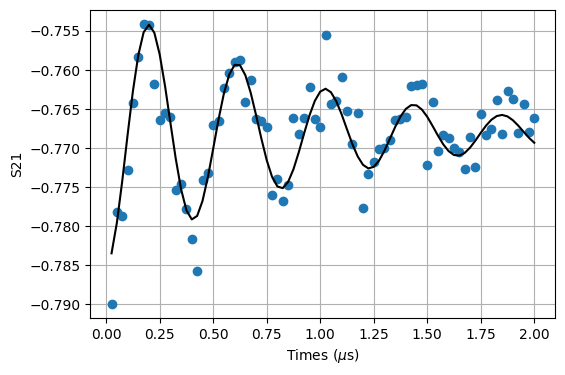

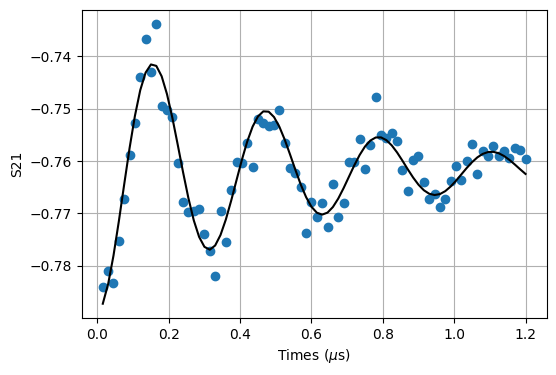

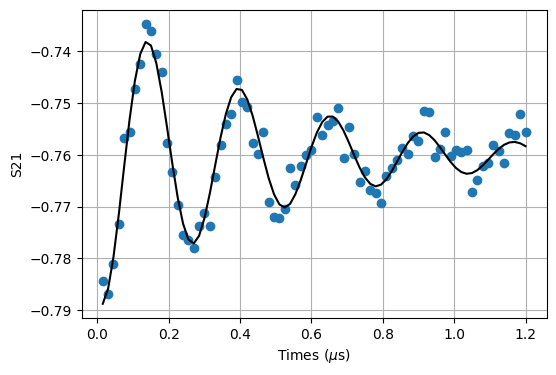

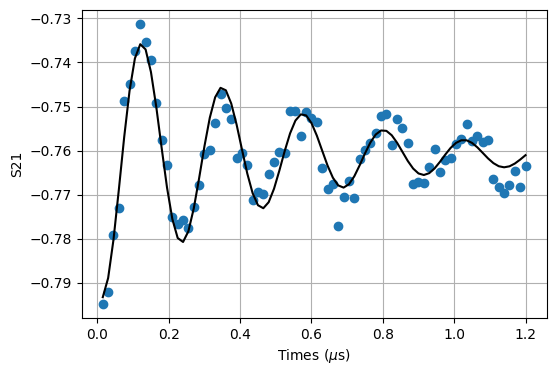

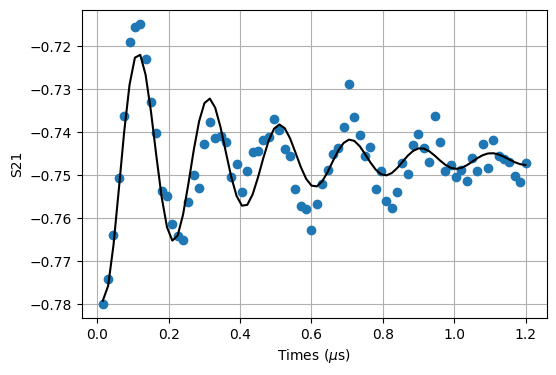

In [5]:
amps_up = np.arange(2, 8)/100
rates_up = np.zeros(len(amps_up))
for i in range(len(amps_up)):
    df = pd.read_csv(dpath + f'q4-upppol-0p0{int(amps_up[i]*100)}-1.csv')
    result = fit_decaying_cos(np.array(df['time'])*1e6, np.array(df['phase']))
    plt.figure(figsize=(6,4))
    plt.plot(np.array(df['time'])*1e6, np.array(df['phase']), 'o')
    plt.ylabel('S21')
    plt.xlabel('Times ($\mu$s)')
    plt.plot(result['x'], result['y_fit'], color='k')
    plt.grid()
    plt.show()
    rates_up[i] = result['params']['f']

Text(0.5, 0, 'Drive Amplitude (a.u.)')

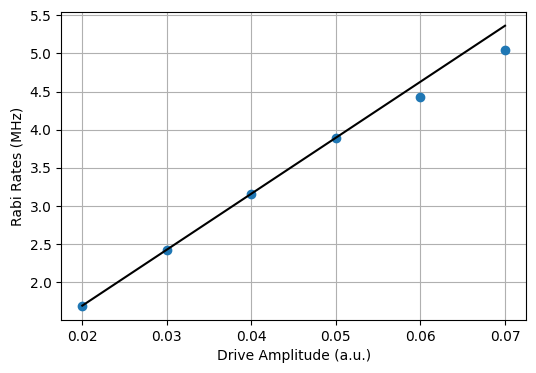

In [7]:
plt.figure(figsize=(6,4))
plt.plot(amps_up, rates_up, 'o')
result_up = fit_line(amps_up[:4], rates_up[:4])
plt.plot(amps_up, amps_up*result_up['params'][1] + result_up['params'][0], color='k')
plt.grid()
plt.ylabel('Rabi Rates (MHz)')
plt.xlabel('Drive Amplitude (a.u.)')

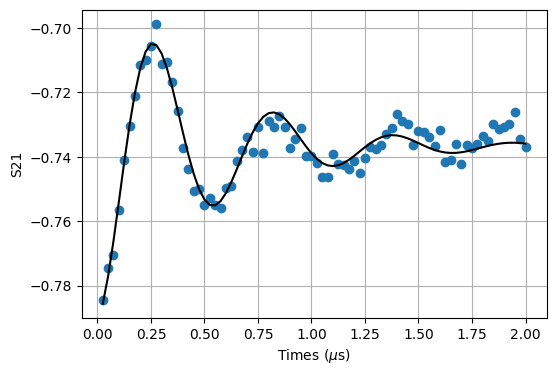

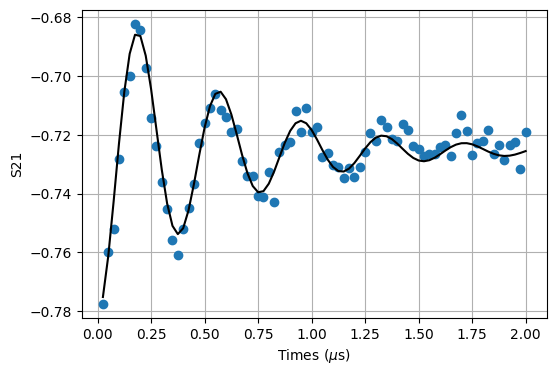

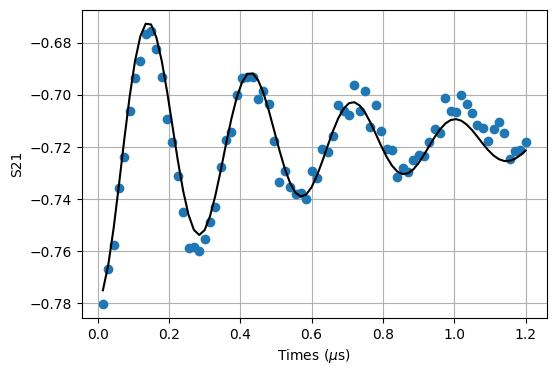

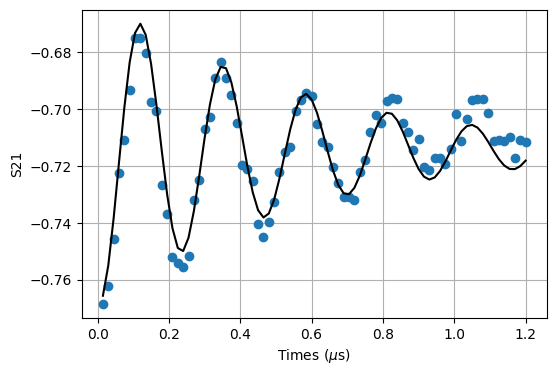

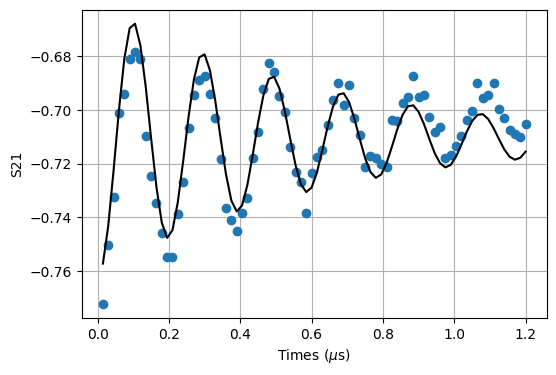

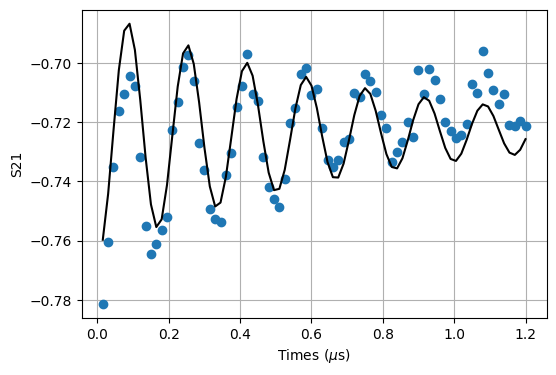

In [10]:
amps_lo = np.arange(2, 8)/100
rates_lo = np.zeros(len(amps_lo))
for i in range(len(amps_lo)):
    df = pd.read_csv(dpath + f'q4-lowpol-0p0{int(amps_up[i]*100)}-1.csv')
    result = fit_decaying_cos(np.array(df['time'])*1e6, np.array(df['phase']))
    plt.figure(figsize=(6,4))
    plt.plot(np.array(df['time'])*1e6, np.array(df['phase']), 'o')
    plt.ylabel('S21')
    plt.xlabel('Times ($\mu$s)')
    plt.plot(result['x'], result['y_fit'], color='k')
    plt.grid()
    plt.show()
    rates_lo[i] = result['params']['f']

Text(0.5, 0, 'Drive Amplitude (a.u.)')

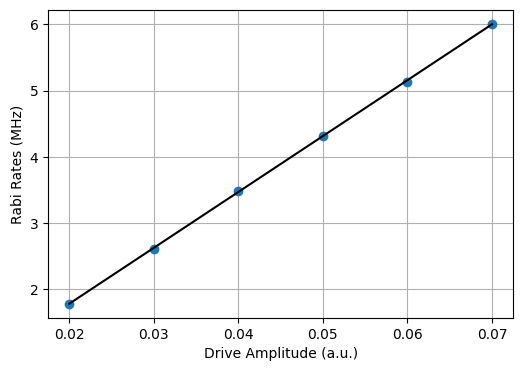

In [11]:
plt.figure(figsize=(6,4))
plt.plot(amps_lo, rates_lo, 'o')
result_lo = fit_line(amps_lo[:4], rates_lo[:4])
plt.plot(amps_lo, amps_lo*result_lo['params'][1] + result_lo['params'][0], color='k')
plt.grid()
plt.ylabel('Rabi Rates (MHz)')
plt.xlabel('Drive Amplitude (a.u.)')

# Compile Figure

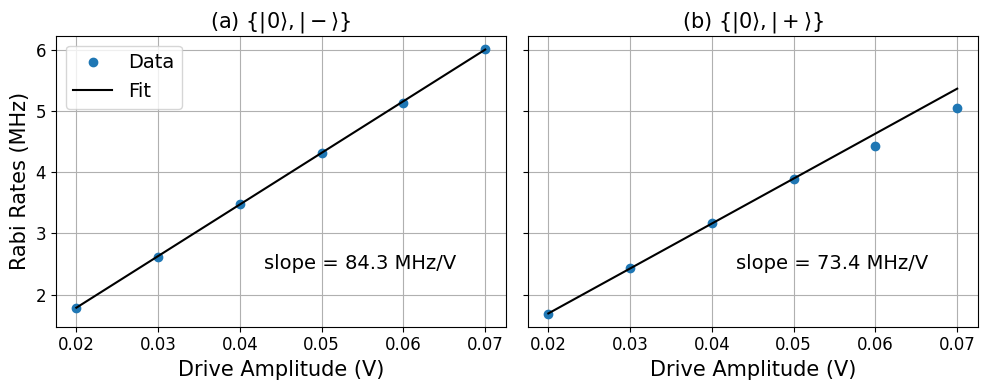

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True)
ax[0].set_title(r'(a) $\{|0\rangle , |-\rangle \}$', fontsize=15)
ax[1].set_title(r'(b) $\{|0\rangle , |+\rangle \}$', fontsize=15)
ax[0].plot(amps_lo, rates_lo, 'o', label='Data')
ax[0].plot(amps_lo, amps_lo*result_lo['params'][1] + result_lo['params'][0], color='k', label='Fit')
ax[0].grid()
ax[0].legend(fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].set_ylabel('Rabi Rates (MHz)', fontsize=15)
ax[0].set_xlabel('Drive Amplitude (V)', fontsize=15)
ax[1].plot(amps_up, rates_up, 'o')
ax[1].plot(amps_up, amps_up*result_up['params'][1] + result_up['params'][0], color='k')
ax[1].grid()
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel('Drive Amplitude (V)', fontsize=15)
fig.tight_layout()
slo = result_lo['params'][1]
ax[0].annotate(f"slope = {slo:.1f} MHz/V", xy=(0.043, 2.5), fontsize=14, ha='left', va='center')
sup = result_up['params'][1]
ax[1].annotate(f"slope = {sup:.1f} MHz/V", xy=(0.043, 2.5), fontsize=14, ha='left', va='center')
fig.savefig('figS1.pdf')